# Making Api request

In [1]:
import pandas as pd
import requests
import json
from dotenv import load_dotenv
import os
import alpaca_trade_api as tradeapi

In [2]:
#make the Api request
# Make the API request
# Set the Ripple endpoint
xrp_url = "https://api.alternative.me/v2/ticker/Ripple/"
response = requests.get(xrp_url).json()

# Display the response data
print(json.dumps(response, indent=4, sort_keys=True))

{
    "data": {
        "52": {
            "circulating_supply": 48135209660,
            "id": 52,
            "last_updated": 1650363746,
            "max_supply": 100000000000,
            "name": "XRP",
            "quotes": {
                "USD": {
                    "market_cap": 36853682816,
                    "percent_change_1h": 0.930786939995598,
                    "percent_change_24h": 4.22007755418544,
                    "percent_change_7d": 10.5260071184315,
                    "percentage_change_1h": 0.930786939995598,
                    "percentage_change_24h": 4.22007755418544,
                    "percentage_change_7d": 10.5260071184315,
                    "price": 0.768802,
                    "volume_24h": 3050369125
                }
            },
            "rank": 6,
            "symbol": "XRP",
            "total_supply": 48135209660,
            "website_slug": "ripple"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [3]:
xrp_symbol = response['data']['52']['symbol']
print(f"The symbol for Ripple is {xrp_symbol}")

xrp_price = response['data']['52']['quotes']['USD']['price']
print(f"The price for Ripple is ${xrp_price}")

The symbol for Ripple is XRP
The price for Ripple is $0.768802


In [4]:
load_dotenv("api.env")

True

In [5]:
quandl_api_key = os.getenv("QUANDL_API_KEY")
type(quandl_api_key)


str

In [6]:
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?limit=10&api_key="
quandl_request_url = request_url + quandl_api_key

response_nasdaq = requests.get(quandl_request_url).json()
print(json.dumps(response_nasdaq, indent=4, sort_keys=True))

{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "Open",
            "High",
            "Low",
            "Close",
            "Volume",
            "Ex-Dividend",
            "Split Ratio",
            "Adj. Open",
            "Adj. High",
            "Adj. Low",
            "Adj. Close",
            "Adj. Volume"
        ],
        "data": [
            [
                "2018-03-27",
                94.94,
                95.139,
                88.51,
                89.47,
                53704562.0,
                0.0,
                1.0,
                94.94,
                95.139,
                88.51,
                89.47,
                53704562.0
            ],
            [
                "2018-03-26",
                90.61,
                94.0,
                90.4,
                93.78,
                55031149.0,
                0.0,
                1.0,
                90.61,

In [7]:
open_2018_03_27 = response_nasdaq["dataset"]["data"][0][1]
open_2018_03_27

94.94

# Working with Alpaca SDK

In [8]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [9]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-05", tz="America/New_York").isoformat()

In [11]:
tickers = ["FB", "TWTR"]

In [12]:
timeframe = "1Day"

In [13]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-06-01 04:00:00+00:00,224.39,232.440,223.5000,231.91,18223882,174872,229.264613,FB
2020-06-02 04:00:00+00:00,230.94,233.000,226.5600,232.72,20919029,191654,229.851235,FB
2020-06-03 04:00:00+00:00,232.39,232.650,228.5300,230.16,15380413,166041,230.239999,FB
2020-06-04 04:00:00+00:00,229.56,231.630,224.6100,226.29,17041531,180306,227.779705,FB
2020-06-05 04:00:00+00:00,226.57,231.350,225.3105,230.77,16750586,166521,229.928852,FB
2020-06-01 04:00:00+00:00,31.06,32.100,30.8400,31.89,14583619,91305,31.700367,TWTR
2020-06-02 04:00:00+00:00,32.19,32.425,31.6100,32.26,15318429,80500,32.076930,TWTR
2020-06-03 04:00:00+00:00,32.68,35.040,32.4400,34.88,28414273,153153,34.010520,TWTR
2020-06-04 04:00:00+00:00,34.49,34.940,33.3400,33.72,20106238,107081,33.960112,TWTR


In [14]:
FB = df_portfolio[df_portfolio['symbol']=='FB'].drop('symbol', axis=1)
TWTR = df_portfolio[df_portfolio['symbol']=='TWTR'].drop('symbol', axis=1)

In [15]:
df_portfolio = pd.concat([FB,TWTR],axis=1, keys=['FB','TWTR'])
df_portfolio

FB                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-06-01 04:00:00+00:00  224.39  232.44  223.5000  231.91  18223882   
2020-06-02 04:00:00+00:00  230.94  233.00  226.5600  232.72  20919029   
2020-06-03 04:00:00+00:00  232.39  232.65  228.5300  230.16  15380413   
2020-06-04 04:00:00+00:00  229.56  231.63  224.6100  226.29  17041531   
2020-06-05 04:00:00+00:00  226.57  231.35  225.3105  230.77  16750586   

                                                    TWTR                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-06-01 04:00:00+00:00      174872  229.264613  31.06  32.100  30.84   
2020-06-02 04:00:00+00:00      191654  229.851235  32.19  32.425  31.61   
2020-06-03 04:00:00+00:00      166041  230.239999  32.68  35.040  32.44   
2020-06-04 04:00:00+00:00      180306  227.779705  34.49  34.940  33.34   
2020-06-05 04:00:00+00:00      166521  229.928852  34.52  35.970  34.47   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2020-06-01 04:00:00+00:00  31.89  14583619       91305  31.700367  
2020-06-02 04:00:00+00:00  32.26  15318429       80500  32.076930  
2020-06-03 04:00:00+00:00  34.88  28414273      153153  34.010520  
2020-06-04 04:00:00+00:00  33.72  20106238      107081  33.960112  
2020-06-05 04:00:00+00:00  34.87  23215030      133451  35.232504

In [16]:
fb_close = df_portfolio["FB"]["close"]
fb_close


timestamp
2020-06-01 04:00:00+00:00    231.91
2020-06-02 04:00:00+00:00    232.72
2020-06-03 04:00:00+00:00    230.16
2020-06-04 04:00:00+00:00    226.29
2020-06-05 04:00:00+00:00    230.77
Name: close, dtype: float64

In [17]:
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)

,FB,TWTR
2020-06-01,231.91,31.89
2020-06-02,232.72,32.26
2020-06-03,230.16,34.88
2020-06-04,226.29,33.72
2020-06-05,230.77,34.87


In [18]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()

,FB,TWTR
2020-06-02,0.003493,0.011602
2020-06-03,-0.011000,0.081215
2020-06-04,-0.016814,-0.033257
2020-06-05,0.019798,0.034104


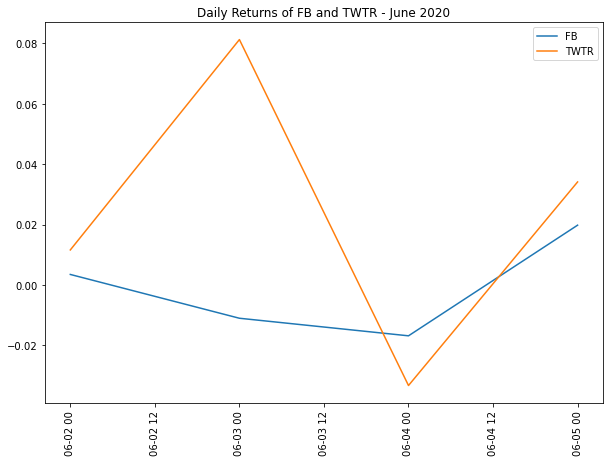

In [19]:
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)

# Using probability to Make financial projections

Probability is a concept in statistics that describes the chance that a particular event will happen.

In finance, we associate probability with the movement of a stock price. A stock price can increase or decrease, and the magnitude of that change also varies. The change in a stock price always remains uncertain. However, by analyzing the past movements in a stock price, we can estimate the likely change in a stock price in both the near-term and the long-term future.


## What’s a Probability Distribution?
A probability distribution is a mathematical function that allows us to visualize the likelihood of probable outcomes for a particular event.

The most-common probability distribution is the normal distribution. Probability distributions such as the normal distribution help us make educated guesses about what might happen to the performance of a stock, bond, or portfolio in the future, especially the near-term future.

## What’s a Normal Distribution?
Various real-world scenarios, from test scores to the daily returns of a stock over time, use the normal distribution. People commonly refer to the normal distribution as the bell curve. It describes a dataset where values that lie further from the mean occur less frequently than those that lie closer to the mean

The standard deviation defines the x-axis of the probability distribution plot. The standard deviation for a dataset defines its probability distribution. We associate a standard deviation of zero with the mean of the dataset. The values of the standard deviations correspond to how the data spreads out around that mean value.

The mean of a dataset is a measure of central tendency that describes the center of a dataset. The standard deviation of a dataset measures how the data spreads out around the mean value. While the mean is a measure of central tendency, the standard deviation is a measure of dispersion. In Pandas, you can find both of these values by using the describe function.

Normal distributions prove particularly useful in finance, because they adequately approximate the volatility of the daily return values for stock prices and other financial assets.

For example, the daily return value from a high-volatility stock, such as Tesla, and from a low-volatility stock, such as Coca-Cola, can both demonstrate normal distributions. This happens despite the differences in company size, customer base, stock price, and market share. And guess what? We can calculate and visualize the normal distributions of such stocks by using Pandas.

In [20]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO"]
# Set timeframe to '1Day'
timeframe = "1Day"
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
TSLA = prices_df[prices_df['symbol']=='TSLA'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
prices_df = pd.concat([TSLA, KO], axis=1, keys=["TSLA", "KO"])


# Display sample data
prices_df.head()
prices_df.tail()

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2020-04-27 04:00:00+00:00  737.61  799.4900  735.00  798.75  20681442   
2020-04-28 04:00:00+00:00  795.30  805.0000  756.69  769.12  15222719   
2020-04-29 04:00:00+00:00  791.68  803.1999  783.16  800.51  16223632   
2020-04-30 04:00:00+00:00  855.00  869.8200  763.50  781.88  28477961   
2020-05-01 04:00:00+00:00  755.00  772.7700  683.04  701.32  32544885   

                                                      KO                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-04-27 04:00:00+00:00      433976  783.972936  46.00  46.975  45.71   
2020-04-28 04:00:00+00:00      313311  776.861887  47.90  48.000  46.57   
2020-04-29 04:00:00+00:00      369255  806.504911  47.20  47.860  46.88   
2020-04-30 04:00:00+00:00      615142  814.171635  46.80  47.000  45.70   
2020-05-01 04:00:00+00:00      728694  719.397692  45.62  46.390  45.21   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2020-04-27 04:00:00+00:00  46.78  19175988      124751  46.501892  
2020-04-28 04:00:00+00:00  46.74  17246696      119237  47.136381  
2020-04-29 04:00:00+00:00  47.12  15780082      112219  47.381483  
2020-04-30 04:00:00+00:00  45.89  20801092      142157  46.036240  
2020-05-01 04:00:00+00:00  45.60  14290418      104457  45.640609

# Analyze the Closing Prices and Daily Returns
To analyze the probability distribution of these stock prices, we first need to create a DataFrame that contains only the closing prices for the period. Then, we can generate our daily returns DataFrame.


In [21]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()
closing_prices_df["KO"] = prices_df["KO"]["close"]
closing_prices_df["TSLA"] = prices_df["TSLA"]["close"]
closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()


# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986


,KO,TSLA
2020-04-27,0.029716,0.101496
2020-04-28,-0.000855,-0.037095
2020-04-29,0.008130,0.040813
2020-04-30,-0.026104,-0.023273
2020-05-01,-0.006319,-0.103034


In [22]:
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


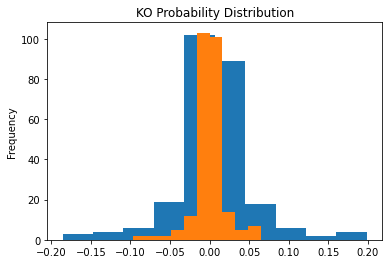

In [23]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df["TSLA"].plot.hist(title='TSLA Probability Distribution')

# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df["KO"].plot.hist(title='KO Probability Distribution')

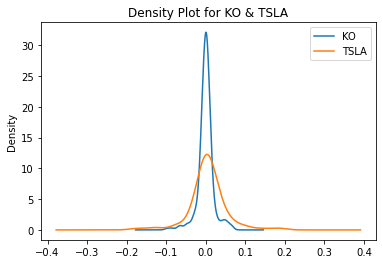

In [24]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns_df.plot.density(title='Density Plot for KO & TSLA')

he overlay of the two distributions shows that the KO distribution has a greater frequency of small daily changes compared to TSLA. The blue line for KO illustrates this. First, note that the y-axis indicates the number of occurrences. The blue line for KO reaches much higher along the y-axis. This line is also much narrower at the base, which measures the standard deviation, or the spread around the mean value. The volatility of the stock causes this. (Remember that the less volatile the stock, the smaller the standard deviation.) That is, a smaller standard deviation means that the stock is less likely to have large changes in value, whether positive or negative.

# Predict performance via the Standard Deviation


In [25]:
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


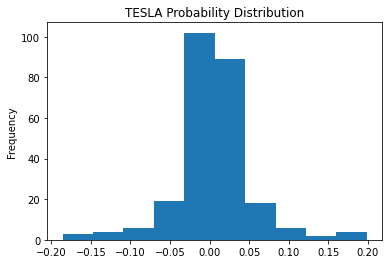

In [26]:
daily_returns_df["TSLA"].plot(kind='hist', title='TESLA Probability Distribution')

A confidence interval defines a range of values that will likely occur with a certain degree of confidence. The values contain the best estimate of a statistical measurement—for example, a daily return value. We express the confidence interval as a percentage. People most commonly use 95% for the confidence interval.

For example, we want to calculate the range of possible daily return values that allows us to make the following statement:

From the analysis of our historical data, with a 95% confidence interval, we can expect our daily return value to be between a lower-bound value and an upper-bound value.

In a normal distribution, 95% of all the values fall within 1.96 standard deviations (std) of the mean value. This translates to the following (where std is the standard deviation):

95% confidence lower-bound return = mean − (1.96 × std)

95% confidence upper-bound return = mean + (1.96 × std)

We calculate the confidence intervals by using a z-score (Enlaces a un sitio externo.). The z-score connects the confidence interval and the standard deviation. The z-score for the 95% confidence interval is 1.96, or 1.96 standard deviations from the mean. The z-score for the 99% confidence interval is 2.576, or 2.576 standard deviations from the mean. The z-score for the mean of a dataset is zero. With the z-score, we can compare the results of an analysis to a normal distribution. The higher the z-score, the further away the value is from the mean.

Using the values from the Zoom Video Communications summary statistics (the mean is 0.003503, and the standard deviation is 0.043823), we can state the following:

From the analysis of the Zoom Video Communications historical return data, with a 95% confidence interval, we can expect our daily return value to fall between −8.239% and +8.808%.

We can use the confidence interval values to calculate the prices that we expect to occur. For example, the price of Zoom Video Communications stock on the last day in the dataset is $138.61. Therefore, we can estimate the following with a 95% confidence interval:

The lower bound of the expected price for the next day is $127.19. We get that from the following equation:

138.61 × (1 − 0.08239).
The upper bound is $150.82. We get that from the following equation:

138.61 × (1 + 0.08808).

## Quantify the Tail Risk
Tail risk occurrences are the possible outcomes that the tail ends of the normal distribution define.

The tail risk arises from the probability that an event will move more than three standard deviations from the mean. Because three standard deviations cover about 99.7% of all occurrences, the probability of tail-risk events is only 0.3%.

To break this down even further, this means that events in the downside tail and those in the upside tail each have a probability of 0.15%. The downside tail includes values that are less than the mean value by more than three standard deviations. The upside tail includes values that are greater than the mean value by more than three standard deviations.


# What’s Portfolio Forecasting?

Portfolio forecasting is the process of simulating the future performance of a portfolio and trying to analyze its most probable outcome. In this lesson, you’ll estimate the range of potential cumulative returns for a portfolio and the corresponding probabilities. This will help you analyze the potential of the portfolio’s performance to deviate from the expected result.

        The cumulative return is the total change in the investment price over time. To calculate the cumulative return, you first sum the individual daily performance changes in a portfolio over the time period. You then multiply that value by the price of the portfolio at the start of the same time period.
        
        


In [27]:
tickers = ["MSFT","KO"]
timeframe = "1Day"
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



MSFT = prices_df[prices_df['symbol']=='MSFT'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)

prices_df = pd.concat([MSFT, KO], axis=1, keys=["MSFT", "KO"])

prices_df.head()

MSFT                                              \
                            open   high     low  close    volume trade_count   
timestamp                                                                      
2017-05-01 04:00:00+00:00  68.68  69.55  68.500  69.41  31954462      159425   
2017-05-02 04:00:00+00:00  69.71  69.71  69.130  69.30  23906119      127335   
2017-05-03 04:00:00+00:00  69.26  69.38  68.710  69.08  28927975      146503   
2017-05-04 04:00:00+00:00  69.03  69.08  68.640  68.81  21749409      109653   
2017-05-05 04:00:00+00:00  68.88  69.03  68.485  69.00  19128782       94910   

                                         KO                                  \
                                vwap   open    high    low  close    volume   
timestamp                                                                     
2017-05-01 04:00:00+00:00  69.161515  43.15  43.500  43.10  43.22  13213724   
2017-05-02 04:00:00+00:00  69.418084  43.22  43.440  43.16  43.39  11825216   
2017-05-03 04:00:00+00:00  68.935096  43.33  43.485  43.15  43.32  10404027   
2017-05-04 04:00:00+00:00  68.820273  43.45  43.810  43.40  43.66  10193084   
2017-05-05 04:00:00+00:00  68.801152  43.84  43.840  43.56  43.69   8133039   

                                                  
                          trade_count       vwap  
timestamp                                         
2017-05-01 04:00:00+00:00       51614  43.317026  
2017-05-02 04:00:00+00:00       53704  43.327701  
2017-05-03 04:00:00+00:00       49212  43.355317  
2017-05-04 04:00:00+00:00       46642  43.634758  
2017-05-05 04:00:00+00:00       38314  43.668253

In [28]:
from montecarlo.montecarlo import MCSimulation

In [29]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

According to the documentation, the MCSimulation module requires us to supply the following parameters to properly configure the Monte Carlo simulation:

portfolio_data: This is the Pandas DataFrame that contains historical stock data from our potential stock portfolio.

weights: This is the percentage that each individual asset makes up in the total portfolio. The weights of the assets must total 100%. For example, in our two-stock portfolio, KO makes up 60% of the portfolio, and MSFT makes up 40%. For the Monte Carlo simulation, we express this as weights = [60%, 40]. The MCSimulation module thus assumes that $6,000 of a $10,000 investment goes to Coca-Cola stock, and $4,000 goes to Microsoft stock.

IMPORTANT
For the weights parameter, we must list the weight of each asset in the order that the assets appear in the DataFrame in the portfolio_data parameter. The Alpaca API call that we made earlier returned a DataFrame that lists KO before MSFT. Therefore, we must list the weight of KO before the weight of MSFT.

num_simulation: This is the number of simulated samples that we want to create. For this example, we should try to simulate a minimum of 500 samples. (However, if you have a more powerful computer and more time, you could try to simulate 1,000 samples. The more samples that run, the more reliable the analysis becomes.)

num_trading_days: This is the number of trading days to simulate. For example, if we want to simulate the stock price returns after five years, we’ll need to multiply 252 (the number of trading days in a year) by 5. We express the syntax as the number of trading days times the number of years (252 * 5).

In [30]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
MC_fiveyear.portfolio_data.head()

MSFT                                              \
                            open   high     low  close    volume trade_count   
timestamp                                                                      
2017-05-01 04:00:00+00:00  68.68  69.55  68.500  69.41  31954462      159425   
2017-05-02 04:00:00+00:00  69.71  69.71  69.130  69.30  23906119      127335   
2017-05-03 04:00:00+00:00  69.26  69.38  68.710  69.08  28927975      146503   
2017-05-04 04:00:00+00:00  69.03  69.08  68.640  68.81  21749409      109653   
2017-05-05 04:00:00+00:00  68.88  69.03  68.485  69.00  19128782       94910   

                                                      KO                 \
                                vwap daily_return   open    high    low   
timestamp                                                                 
2017-05-01 04:00:00+00:00  69.161515          NaN  43.15  43.500  43.10   
2017-05-02 04:00:00+00:00  69.418084    -0.001585  43.22  43.440  43.16   
2017-05-03 04:00:00+00:00  68.935096    -0.003175  43.33  43.485  43.15   
2017-05-04 04:00:00+00:00  68.820273    -0.003909  43.45  43.810  43.40   
2017-05-05 04:00:00+00:00  68.801152     0.002761  43.84  43.840  43.56   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  43.22  13213724       51614  43.317026          NaN  
2017-05-02 04:00:00+00:00  43.39  11825216       53704  43.327701     0.003933  
2017-05-03 04:00:00+00:00  43.32  10404027       49212  43.355317    -0.001613  
2017-05-04 04:00:00+00:00  43.66  10193084       46642  43.634758     0.007849  
2017-05-05 04:00:00+00:00  43.69   8133039       38314  43.668253     0.000687

In [32]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993668,1.001443,0.997816,1.015029,0.995338,1.001165,0.986426,0.991798,1.000588,1.004956,...,0.995247,0.987052,1.008398,0.989796,1.017862,1.001926,1.015617,0.988184,0.990244,0.995194
2,0.982158,1.011896,1.004319,1.014901,1.005021,0.994234,0.992874,0.973551,0.991047,1.028807,...,0.979581,1.002485,1.008243,0.985339,1.011085,1.014228,1.026016,1.000916,0.988923,0.996231
3,0.987695,1.030228,1.022418,1.031417,0.993352,0.995051,0.995248,0.956930,0.980591,1.023094,...,0.959443,1.002561,1.013967,0.994699,1.021719,1.003782,1.026112,1.019490,1.002189,0.983670
4,0.992311,1.032318,1.016901,1.053288,0.996826,1.012981,0.991004,0.939108,0.968043,1.025649,...,0.974797,1.010911,1.001442,0.978737,1.017666,1.024157,1.020673,1.047401,0.998721,0.998598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.492269,1.041446,1.504100,1.287380,4.662590,2.334230,1.587214,1.946581,1.988832,1.598696,...,1.424023,2.781886,2.577307,1.768435,0.988168,2.064460,2.793349,3.314691,2.130466,3.571417
1257,3.523649,1.032727,1.483516,1.299092,4.747153,2.337886,1.590692,2.006764,2.011269,1.575551,...,1.413528,2.822530,2.620837,1.767333,1.008186,2.052184,2.801216,3.290496,2.121947,3.557327
1258,3.517738,1.020116,1.486257,1.313817,4.755109,2.372182,1.574055,2.006524,2.023669,1.576816,...,1.416050,2.831608,2.600808,1.738046,0.986209,2.012473,2.785549,3.295380,2.111448,3.507864
1259,3.555680,1.018451,1.467309,1.306876,4.793419,2.327586,1.547098,1.972076,1.977482,1.594281,...,1.424074,2.802191,2.567940,1.721978,0.980808,2.025673,2.773389,3.392230,2.141245,3.426710


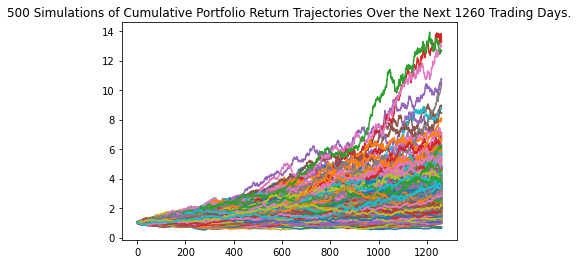

In [33]:
# Plot simulation outcomes
MC_sim_line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

The overlay line plot shows the trajectory of each sample across the 1,260 simulated trading days. The x-axis shows the trading days, and the y-axis shows the cumulative return of the portfolio.

A cumulative return value of 1 indicates that no change in the portfolio value occurred. The plot shows some cumulative return values of 2, 4, or even 6 times the original value. However, it’s difficult to determine the distribution of values from this perspective.

To visualize the distribution of cumulative return values, we’ll create a histogram by using the plot_distribution function, as the following code shows:

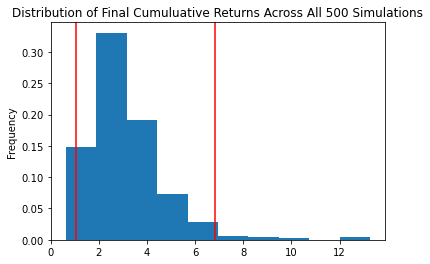

In [34]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

This plot visualizes the final cumulative return values for all 500 simulated samples. The x-axis represents the final cumulative return values. The y-axis represents the frequency of each bin, or how often the simulation calculated each category of cumulative return values. For example, the bin of cumulative return values from 2 to 2.5 occurred the most frequently.

The vertical red lines in the plot visualize the 95% confidence interval. The plot indicates that with a 95% confidence level, we can expect a cumulative return of about 1 to 4.5 times the original investment amount.


In [36]:

# Generate the Summary Statistics
MC_summary_statistics = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics Series
print(MC_summary_statistics)

count           500.000000
mean              3.100971
std               1.655592
min               0.628139
25%               2.037834
50%               2.721801
75%               3.753420
max              13.267777
95% CI Lower      1.046809
95% CI Upper      6.813612
Name: 1260, dtype: float64


Notice the two new statistics that this Series lists: 95% CI Lower and 95% CI Upper. Given a 95% confidence interval, these values represent the lower and upper bounds of the cumulative performance of the portfolio. We can use these values to calculate the range of possible outcomes from a $10,000 investment in Coca-Cola and Microsoft, as the following code shows

In [37]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8] * 10000
ci_95_upper_cumulative_return = MC_summary_statistics[9] * 10000


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
    f" over the next 5 years will end within in the range of"
    f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $ 10468.09 and $ 68136.12.


Although this result presents potentially fantastic news, it’s important to note that these five-year forecasted return values are based on only three years of historical price data. The five-year forecast simulates more variability than the data that the simulation is based on includes. In general, it’s ideal to supply one year of historical data for each year of simulated data.

If we simulate using only small amounts of data during a recent time when markets are booming, or instead falling precipitously, a Monte-Carlo Analysis will inadvertently extrapolate this temporary market movement too far into the future. Getting data over a longer time period mitigates this effect. Due to the limitations of the Alpaca API, however, we can typically produce just three full years of historical data.

